In [1]:
import numpy as np

In [2]:
X = np.arange(10).reshape(5,-1)
y = np.arange(5)

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=180614)

In [4]:
N = 5
X = np.arange(8*N).reshape(-1, 2) * 10
y = np.hstack([np.ones(N), np.ones(N)*2, np.ones(N)*3, np.ones(N)*4])

In [5]:
from sklearn.model_selection import KFold

cv = KFold(n_splits=3, shuffle=True, random_state=180614)
for train_index, test_index in cv.split(X):
    print('train : {}'.format(train_index))
    print('test : {}'.format(test_index))
    print('-'*50)

train : [ 1  2  3  8  9 10 11 12 14 16 17 18 19]
test : [ 0  4  5  6  7 13 15]
--------------------------------------------------
train : [ 0  4  5  6  7  9 10 11 13 14 15 18 19]
test : [ 1  2  3  8 12 16 17]
--------------------------------------------------
train : [ 0  1  2  3  4  5  6  7  8 12 13 15 16 17]
test : [ 9 10 11 14 18 19]
--------------------------------------------------


In [6]:
from sklearn.model_selection import LeaveOneOut

cv = LeaveOneOut()

for train_idx, test_idx in cv.split(X):
    print('train : {}'.format(train_idx))
    print('test : {}'.format(test_idx))
    print('-'*50)

train : [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
test : [0]
--------------------------------------------------
train : [ 0  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
test : [1]
--------------------------------------------------
train : [ 0  1  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
test : [2]
--------------------------------------------------
train : [ 0  1  2  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
test : [3]
--------------------------------------------------
train : [ 0  1  2  3  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
test : [4]
--------------------------------------------------
train : [ 0  1  2  3  4  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
test : [5]
--------------------------------------------------
train : [ 0  1  2  3  4  5  7  8  9 10 11 12 13 14 15 16 17 18 19]
test : [6]
--------------------------------------------------
train : [ 0  1  2  3  4  5  6  8  9 10 11 12 13 14 15 16 17 18 19]
test : [7]
-------------------

In [7]:
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=5, test_size= 0.2, random_state=180614)
for train_idx, test_idx in cv.split(X):
    print(test_idx)

[ 7  0 15  4]
[18  8  9  3]
[1 6 0 9]
[16 17  1  7]
[12  8 10 16]


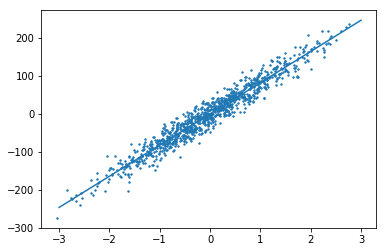

In [19]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

X, y, coef = make_regression(n_samples=1000, n_features=1, noise=20, coef=True, random_state=0)

x_pred = np.linspace(-3,3,100)
y_pred = coef*x_pred

plt.scatter(X,y, s=2)
plt.plot(x_pred, y_pred)
plt.show()

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model = LinearRegression()
cv = KFold(10)

scores = np.zeros(10)
for i, (train_idx, test_idx) in enumerate(cv.split(X)):
    X_train = X[train_idx]
    y_train = y[train_idx]
    X_test = X[test_idx]
    y_test = y[test_idx]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores[i] = r2_score(y_test, y_pred)

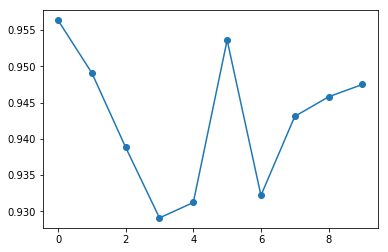

In [34]:
plt.plot(scores, '-o')
plt.show()

In [39]:
from sklearn.model_selection import cross_val_score

cross_val_score(model, X, y, scoring='r2', cv=cv)

array([0.95636425, 0.94908323, 0.93880683, 0.92906829, 0.93119768,
       0.95362566, 0.93217768, 0.94308775, 0.94579305, 0.94749884])